In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the training and testing dataset

training_df = pd.read_csv(r"C:\Users\ridhi.jain\Python\Project 2_ML\train.csv")
testing_df = pd.read_csv(r"C:\Users\ridhi.jain\Python\Project 2_ML\test.csv")

In [3]:
#View the training dataset

training_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
#view the testing dataset

testing_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
# Dataset shape

print("Training Dataset Shape:", training_df.shape)
print("Testing Dataset Shape:", testing_df.shape)

Training Dataset Shape: (9557, 143)
Testing Dataset Shape: (23856, 142)


## Identify the output variable

In [6]:
for column in training_df.columns:
    if column not in testing_df.columns:
        print("The output variable/Target Column:", column)

The output variable/Target Column: Target


## Understand the type of data.

In [7]:
# types of dataset

training_df.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

## Check if there are any biases in your dataset.

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


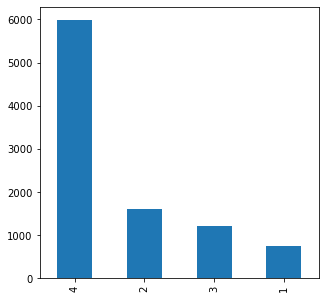

In [8]:
# types of target value

print(training_df['Target'].value_counts())
training_df['Target'].value_counts().plot.bar(figsize=(5,5))

#### Target column in the training set represents the poverty level on a scale of 1-4, where value 1 is extremely poor. The above figure shows there is an unequal distribution in the output claa and hence the data is biased

## Count how many null values are existing in columns.

In [9]:
null_counts = training_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

rez_esc      7928
v18q1        7342
v2a1         6860
SQBmeaned       5
meaneduc        5
dtype: int64

#### 5 columns out of 143 columns in the training set have missing values, which are:
##### rez_esc  - Years behind in school
#####  v18q1  - number of tablets household owns
#####  v2a1 - Monthly rent payment
#####  SQBmeaned - square of the mean years of education of adults (>=18) in the household
#####  meaneduc  - average years of education for adults (18+)

## Treating the columns with null values to fill them appropriately

In [10]:
training_df['rez_esc'].fillna(value=0, inplace=True)

In [11]:
training_df['v18q1'].fillna(value=0, inplace=True)

In [12]:
training_df['v2a1'].fillna(value=0, inplace=True)

In [13]:
training_df['SQBmeaned'].fillna(value=0, inplace=True)

In [14]:
training_df['SQBmeaned'].fillna(value=0, inplace=True)

In [15]:
training_df['meaneduc'].fillna(value=0, inplace=True)

## Check if there is a house without a family head.

In [16]:
training_df['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

#### The column 'idhogar' acts as household level identifier so each houshold is assigned a level indentifier and further the column 'parentesco1' tells of there exists a household head. So, there are 6584 houses without a family head.

In [17]:
training_df['idhogar'].value_counts().head()

fd8a6d014    13
0c7436de6    12
ae6cf0558    12
4476ccd4c    11
b7a0b59d7    11
Name: idhogar, dtype: int64

#### And, if the data for both the columns is grouped, we will get the total number of households based on the level identifiers that do not have a head of the famiy

In [18]:
No_of_households = training_df.groupby('idhogar')['parentesco1'].sum()
no_head = training_df.loc[training_df['idhogar'].isin(No_of_households[No_of_households == 0].index), :]
no_head['idhogar'].nunique()

15

#### There are 15 unique households with 6584 houses that do not have the head of the house

## Check whether all members of the house have the same poverty level.

In [19]:
#to check which households has different target values with respect to the household level identifier

target_by_household = training_df.groupby('idhogar')['Target'].nunique()
print('There are {} households where all the members does not have unique target values'.format(sum(target_by_household>1)))

There are 85 households where all the members does not have unique target values


In [20]:
# The number of houses that belong to the same household level but have different target value

target_by_household.value_counts()

1    2903
2      84
3       1
Name: Target, dtype: int64

#### Overall there are 2903 housesholds that have the houses with same target value within them, and a total of 85 households out of which 84 household with houses that have 2 different target values and 1 household has houses with 3 different target values

## Set poverty level of the members and the head of the house within a family.

In [21]:
#no of households where all members do not have unique values
different_households = target_by_household[target_by_household != True]
len(different_households)

85

In [22]:
training_df[training_df['idhogar'] == target_by_household.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7471,001ff74ca,0,4
7472,001ff74ca,1,4


In [23]:
no_head_equal = no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(no_head_equal == False)))

0 Households with no head have different labels.


## Predict the accuracy using random forest classifier.

### Segregating the Household and Individual Level Variables for Further Reduction in Dimensionality and treating different datatypes columns

In [24]:
#dropping unnecessary columns

drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
print('Shape of training set before dropping squared columns',training_df.shape)
training_df.drop(columns= drop_columns, inplace=True)
print('Shape of training set after dropping squared columns',training_df.shape)

Shape of training set before dropping squared columns (9557, 143)
Shape of training set after dropping squared columns (9557, 134)


In [25]:
# Treating 'edjefe' & 'edjefa' columns and Mapping 'no' with 0 and yes to 1
training_df['edjefe'].value_counts()
training_df['edjefe'][(training_df['edjefe'] =='no') | (training_df['edjefe'] =='yes')].value_counts().sort_index()
training_df['edjefe'].replace({'no':0, 'yes':1},inplace=True)
training_df['edjefe'][(training_df['edjefe'] =='no') | (training_df['edjefe'] =='yes')].value_counts().sort_index()

Series([], Name: edjefe, dtype: int64)

In [26]:
#Replacing 'edjefa' column's values
print('Before Replacing',training_df['edjefa'][(training_df['edjefa'] =='no') | (training_df['edjefa'] =='yes')]
      .value_counts().sort_index())
training_df['edjefa'].replace({'no':0, 'yes':1},inplace=True)
print('after replace:',training_df['edjefa'][(training_df['edjefa'] =='no') | (training_df['edjefa'] =='yes')]
      .value_counts().sort_index())

Before Replacing no     6230
yes      69
Name: edjefa, dtype: int64
after replace: Series([], Name: edjefa, dtype: int64)


In [27]:
# Dependency Column 'Yes' & 'no' value interpretation

training_df['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
3.5            18
1.25           18
.80000001      18
2.25           13
.71428573      12
.22222222      11
.83333331      11
1.75           11
1.2            11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [28]:
print('Before Replacing\n',training_df['dependency'][(training_df['dependency'] =='no') | (training_df['dependency'] =='yes')]
      .value_counts().sort_index())
training_df['dependency'].replace({'no':0, 'yes':1},inplace=True)
print('After Replacing\n',training_df['dependency'][(training_df['dependency'] =='no') | (training_df['dependency'] =='yes')]
      .value_counts().sort_index())

Before Replacing
 no     1747
yes    2192
Name: dependency, dtype: int64
After Replacing
 Series([], Name: dependency, dtype: int64)


In [29]:
id_cols = ['Id', 'idhogar', 'Target'] # identity & Target columns

# Individual boolean variables
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

# Individual Ordered variables
ind_ord = ['rez_esc', 'escolari', 'age']

# Household boolean

house_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

# Household ordered

house_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

# Household continuous
house_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [30]:
# Household Level Analysis

house_cols = id_cols + house_bool + house_ordered + house_cont
house_train_dataset = training_df.loc[training_df['parentesco1']==1,house_cols]
house_train_dataset.shape

(2973, 98)

In [31]:
# Formulate the correlation matrix to see if there is any strong coorelation between the variables
house_train_dataset_corr = house_train_dataset.corr()               # corr matrix
house_train_dataset_corr_shape = house_train_dataset_corr.shape     # shape of correlation matrix
true_bools = np.ones(house_train_dataset_corr_shape).astype(bool)   # True boolean matrix of shape mXn (shape as above) 
upper_tri_bools = np.triu(true_bools,k=1)                           # k=1 excludes the diagonal values as well
upper_house_train_dataset_corr = house_train_dataset_corr.where(upper_tri_bools) #Where cond is True, keep the original value
household_col_to_drop = [column for column in upper_house_train_dataset_corr.columns 
                         if any(abs(upper_house_train_dataset_corr[column])>0.95)]
household_col_to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [32]:
# Individual Level Analysis
individual_cols = id_cols + ind_bool + ind_ord
ind_train_dataset = training_df[individual_cols]
ind_train_dataset.shape

# correlation matrix
individual_cols_corr = training_df[individual_cols].corr()
individual_cols_corr_shape = individual_cols_corr.shape
ind_true_bool = np.ones(individual_cols_corr_shape).astype(bool)
ind_upper_tri_bool = np.triu(ind_true_bool, k=1)
ind_upper_tri_corr = individual_cols_corr.where(ind_upper_tri_bool)
ind_cols_to_drop = [column for column in ind_upper_tri_corr.columns if any(abs(ind_upper_tri_corr[column])>0.95)]
ind_cols_to_drop

['female']

In [33]:
final_drop_col = ['area2', 'female','tamhog', 'hogar_total', 'r4t3', 'Id', 'idhogar']
training_df.drop(columns=final_drop_col, inplace=True)
training_df.shape

(9557, 127)

In [34]:
from sklearn.model_selection import train_test_split

X = training_df.iloc[:,:-1]
y = training_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
shapes = [X_train.shape,y_train.shape, X_test.shape,y_test.shape]
shapes

[(7645, 126), (7645,), (1912, 126), (1912,)]

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=100, oob_score = True, n_jobs = -1, criterion = 'gini')

print(RF_classifier)

RandomForestClassifier(n_jobs=-1, oob_score=True)


In [37]:
from sklearn import metrics
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
RF_classifier.fit(X_train, y_train)
y_pred_rf = RF_classifier.predict(X_test)

In [39]:
print('Random Forest R2 Score', metrics.r2_score(y_train,RF_classifier.predict(X_train)))
print('Random Forest OOB Score',RF_classifier.oob_score_ )

Random Forest R2 Score 1.0
Random Forest OOB Score 0.9260954872465664


In [40]:
# Prediction Accuracy

print(metrics.classification_report(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.95      0.84      0.89       164
           2       0.94      0.86      0.90       311
           3       0.97      0.79      0.87       254
           4       0.92      0.99      0.96      1183

    accuracy                           0.93      1912
   macro avg       0.95      0.87      0.90      1912
weighted avg       0.93      0.93      0.93      1912

[[ 138    8    0   18]
 [   5  269    4   33]
 [   2    5  200   47]
 [   0    5    2 1176]]


#### from above, we can see that the accuracy of the model is 93%

## Check the accuracy using random forest with cross validation.

In [41]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
RF_classifier_kfold = RandomForestClassifier(n_estimators=100,
                                            n_jobs = -1, random_state=10
                                            )
RF_classifier_kfold.fit(X_train,y_train)
Accuracy_Values=cross_val_score(RF_classifier_kfold, X , y, cv=kfold, scoring='accuracy')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean()*100,2))


Accuracy values for 10-fold Cross Validation:
 [0.93723849 0.91736402 0.92098378 0.93720565 0.9392988 ]

Final Average Accuracy of the model: 93.04


## Using the model on test set

In [42]:
# cleaning and preprocessing the testing dataset

mapping = {'no':0,'yes':1}

# edjefe, edjefa, dependancy

testing_df['edjefe'] = testing_df['edjefe'].replace(mapping)
testing_df['edjefa'] = testing_df['edjefa'].replace(mapping)
testing_df['dependency'] = testing_df['dependency'].replace(mapping).astype(np.float64)

# Replacing Null values
testing_df['v2a1'].fillna(value=0, inplace=True)
testing_df['v18q1'].fillna(value=0, inplace=True)
testing_df['rez_esc'].fillna(value=0, inplace=True)
testing_df['meaneduc'].fillna(value=0, inplace=True)
testing_df['SQBmeaned'].fillna(value=0, inplace=True)
test_nulls_count = testing_df.isnull().sum()
print(test_nulls_count[test_nulls_count>0])

Series([], dtype: int64)


### Dropping Test columns based on our analysis of Training Data

In [43]:
test_drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                    'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
                     'agesq','area2', 'female','tamhog', 'hogar_total', 'r4t3', 'Id', 'idhogar']
testing_df.drop(columns=test_drop_columns, inplace=True)
testing_df.shape

(23856, 126)

In [44]:
test_data_prediction_kfold = RF_classifier_kfold.predict(testing_df)
test_data_prediction_kfold

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)